#### Package and Dataset Import

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

df=pd.read_csv('HR_comma_sep.csv')
print(df.shape)
df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Training and Test Dataset split. 

In [71]:
column=df.columns
column=column.tolist()
column.remove('salary')
column.remove('Department')
column.remove('left')
#column.remove('average_montly_hours')

X=df[column]
Y=df['left']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=6)

#### Model Initialization and Training

In [75]:
model=LogisticRegression(solver='lbfgs',max_iter=1000)

model.fit(x_train,y_train)

y_predict=model.predict(x_test)

coef=model.coef_.T
coef_dat=pd.DataFrame(coef,index=column,columns=['Coefficients'])
coef_dat

,Coefficients
satisfaction_level,-3.968435
last_evaluation,0.748599
number_project,-0.314104
average_montly_hours,0.004762
time_spend_company,0.247701
Work_accident,-1.507186
promotion_last_5years,-1.771159


#### Model Accuracy and Confusion Matrix

Model Score: 76.36666666666667
Model Accuracy Score from Confusion Matrix : 0.7636666666666667

     Confusion Matrix


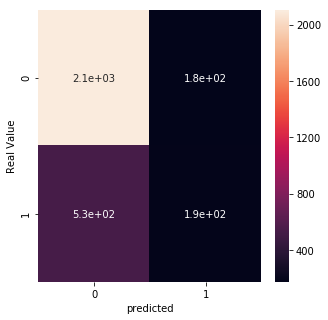

In [76]:
print('Model Score:',model.score(x_test,y_test)*100)
print('Model Accuracy Score from Confusion Matrix :',accuracy_score(y_test,y_predict))
print('\n     Confusion Matrix')
plt.figure(figsize=(5,5))
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Real Value')
plt.show()